# Open Street Map

In this lab, you will learn how to:
* use various python libraries to search for and download Open Street Map *building* data
* categorize buildings by type
* visualize buildings on a map
* create a function to produce building maps
* create a loop to produce building maps for multiple locations

Note that we will learn how to use street network analysis with OSMnx in subsequent labs.

![osm](images/OSM.png)
What is open street map?
- https://www.openstreetmap.org/

OSMnx
- library documentation (https://osmnx.readthedocs.io)
- github (https://github.com/gboeing/osmnx)
- Examples and demos are available at: https://github.com/gboeing/osmnx-examples

Contextily
- https://github.com/geopandas/contextily

Lesson flow inspiration:
- https://youtu.be/QQmvq1cQHrk

## Download visualizing Open Street Map data

OSMnx lets you download data from Open Street Map.

You can download OSM data by providing OSMnx any of the following:
  - a bounding box
  - a lat-long point plus a distance
  - an address plus a distance
  - a place name or list of place names (to automatically geocode and get the boundary of)
  - a polygon of the desired street network's boundaries
  - a .osm formatted xml file


<div class="alert alert-info">
    
`osmnx` uses nominatim to geocode and find places. Make sure that the geography you search for is searchable here first:

https://nominatim.openstreetmap.org/ui/search.html

</div>

For the sake of clarity, and effective use of a workshop setting, let's use the "address plus a distance" method to download a street network dataset.

<div class="alert alert-danger">
    
Be careful! If your geography is too big (like Los Angeles, or Tokyo), it will take a loooooong time to donwload the data. Start small, think neighborhoods, like a zipcode, or Boyle Heights.

</div>

## Import the libraries

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

## Define an area of interest

In [ ]:
address = 'Santa Monica, Los Angeles, CA'

In [2]:
address = 'Koreatown, Los Angeles, California, USA'

In [3]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM that are tagged as 'building' for a 1000m X 1000m square area
osm = ox.geometries_from_address(address,tags={'building':True},dist=1000)

CPU times: user 966 ms, sys: 103 ms, total: 1.07 s
Wall time: 9.97 s


Note the tags argument: `'building':True`. This indicates a desire to download *all* buildings for the given geography. There are many other options to filter what you download from OSM. 
* https://wiki.openstreetmap.org/wiki/Map_Features

<div class="alert alert-danger">
    
<h2>Be careful!</h2>

Buildings are the "heaviest" data types to download, as they often encompass thousands of polygons. While you are technically capable of downloading buildings for entire neighborhoods and cities, doing so can easily overwhelm your notebook. Start small, and scale up!
</div>

In [4]:
# how many rows and columns?
osm.shape

(3549, 85)

In [5]:
# what is the datatype?
type(osm)

geopandas.geodataframe.GeoDataFrame

In [6]:
# show me 10 random rows
osm.sample(10)

unique_id      osmid element_type  \
257   way/402237198  402237198          way   
622   way/402273181  402273181          way   
892   way/402312382  402312382          way   
2102  way/428566577  428566577          way   
1782  way/428556516  428556516          way   
2723  way/428616780  428616780          way   
114   way/401910893  401910893          way   
2813  way/428624395  428624395          way   
2665  way/428587619  428587619          way   
676   way/402279959  402279959          way   

                                               geometry amenity  \
257   POLYGON ((-118.29489 34.05683, -118.29482 34.0...     NaN   
622   POLYGON ((-118.29930 34.05460, -118.29937 34.0...     NaN   
892   POLYGON ((-118.30259 34.05337, -118.30220 34.0...     NaN   
2102  POLYGON ((-118.30839 34.05044, -118.30839 34.0...     NaN   
1782  POLYGON ((-118.31135 34.05355, -118.31141 34.0...     NaN   
2723  POLYGON ((-118.31140 34.05852, -118.31140 34.0...     NaN   
114   POLYGON ((-118.30290 34.05814, -118.30292 34.0...     NaN   
2813  POLYGON ((-118.31072 34.05779, -118.31108 34.0...     NaN   
2665  POLYGON ((-118.29954 34.05066, -118.29947 34.0...     NaN   
676   POLYGON ((-118.30518 34.05542, -118.30518 34.0...     NaN   

                                                  nodes     building   ele  \
257   [4046521435, 4046521436, 4046521437, 404652143...  residential  75.6   
622   [4046908927, 4046908928, 4046908925, 404690892...  residential  71.0   
892   [4047257136, 4047257137, 4047257138, 404725713...          yes   NaN   
2102  [4276504280, 4276504195, 4276504194, 427650427...   apartments  58.3   
1782  [4276441012, 4276441013, 4276441031, 427644103...        house  69.5   
2723  [4277020772, 4277020779, 4277020778, 427702083...   apartments  80.4   
114   [4043220510, 4284092462, 4284092469, 404322051...        house  67.8   
2813  [4277157910, 4277157907, 4277157955, 427715795...   apartments  68.1   
2665  [4276752787, 4276752788, 4276752762, 427675276...        house  65.7   
676   [4046956592, 4284996166, 4284996165, 428499618...   apartments  79.7   

     height lacounty:ain  ... contact:yelp stars bench  lit shelter_type  bin  \
257     4.3   5094014017  ...          NaN   NaN   NaN  NaN          NaN  NaN   
622     4.2   5094022001  ...          NaN   NaN   NaN  NaN          NaN  NaN   
892     NaN          NaN  ...          NaN   NaN   NaN  NaN          NaN  NaN   
2102    4.2   5080010012  ...          NaN   NaN   NaN  NaN          NaN  NaN   
1782    9.4   5081033005  ...          NaN   NaN   NaN  NaN          NaN  NaN   
2723   19.5   5092028006  ...          NaN   NaN   NaN  NaN          NaN  NaN   
114     7.8   5093025003  ...          NaN   NaN   NaN  NaN          NaN  NaN   
2813    8.4   5093002011  ...          NaN   NaN   NaN  NaN          NaN  NaN   
2665    4.6   5078020025  ...          NaN   NaN   NaN  NaN          NaN  NaN   
676    20.5   5093016015  ...          NaN   NaN   NaN  NaN          NaN  NaN   

     ways type name:es name:ko  
257   NaN  NaN     NaN     NaN  
622   NaN  NaN     NaN     NaN  
892   NaN  NaN     NaN     NaN  
2102  NaN  NaN     NaN     NaN  
1782  NaN  NaN     NaN     NaN  
2723  NaN  NaN     NaN     NaN  
114   NaN  NaN     NaN     NaN  
2813  NaN  NaN     NaN     NaN  
2665  NaN  NaN     NaN     NaN  
676   NaN  NaN     NaN     NaN  

[10 rows x 85 columns]

## Eliminate unnecessary columns
The dataframe has 85 columns. Let's explore what these are, and which ones are necessary for our use.

In [7]:
# Get a full list of columns
list(osm)

['unique_id',
 'osmid',
 'element_type',
 'geometry',
 'amenity',
 'nodes',
 'building',
 'ele',
 'height',
 'lacounty:ain',
 'lacounty:bld_id',
 'start_date',
 'name',
 'building:units',
 'office',
 'shop',
 'brand',
 'brand:wikidata',
 'brand:wikipedia',
 'addr:housenumber',
 'building:levels',
 'cuisine',
 'takeaway',
 'parking',
 'source',
 'addr:city',
 'addr:postcode',
 'addr:state',
 'addr:street',
 'gnis:county_name',
 'gnis:feature_id',
 'gnis:import_uuid',
 'hist_name',
 'historic',
 'source_ref',
 'wikipedia',
 'build:levels',
 'building:levels:underground',
 'internet_access',
 'internet_access:fee',
 'internet_access:ssid',
 'phone',
 'tourism',
 'website',
 'wikidata',
 'access',
 'building:use',
 'religion',
 'healthcare',
 'healthcare:speciality',
 'addr:country',
 'addr:suburb',
 'roof:levels',
 'country',
 'diplomatic',
 'name:en',
 'email',
 'fax',
 'opening_hours',
 'consulate',
 'name:id',
 'target',
 'old_name',
 'operator',
 'wheelchair',
 'bar',
 'delivery',
 'g

What are the datatypes and count of null values?

In [8]:
osm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3549 entries, 0 to 3548
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   unique_id                    3549 non-null   object  
 1   osmid                        3549 non-null   int64   
 2   element_type                 3549 non-null   object  
 3   geometry                     3549 non-null   geometry
 4   amenity                      43 non-null     object  
 5   nodes                        3549 non-null   object  
 6   building                     3549 non-null   object  
 7   ele                          3472 non-null   object  
 8   height                       3475 non-null   object  
 9   lacounty:ain                 3472 non-null   object  
 10  lacounty:bld_id              3473 non-null   object  
 11  start_date                   3252 non-null   object  
 12  name                         92 non-null     object  


Really, what we need is just...

In [9]:
## subset it
columns_to_keep = ['geometry','building']
osm = osm[columns_to_keep]
osm.sample(10)

geometry     building
1834  POLYGON ((-118.31102 34.05310, -118.31096 34.0...  residential
2365  POLYGON ((-118.30077 34.05155, -118.30077 34.0...   apartments
2854  POLYGON ((-118.29239 34.05162, -118.29239 34.0...  residential
475   POLYGON ((-118.29446 34.05563, -118.29446 34.0...  residential
2553  POLYGON ((-118.29947 34.04967, -118.29953 34.0...  residential
2054  POLYGON ((-118.30578 34.05074, -118.30575 34.0...        house
2667  POLYGON ((-118.29831 34.05364, -118.29831 34.0...  residential
3507  POLYGON ((-118.30843 34.05852, -118.30842 34.0...   apartments
1697  POLYGON ((-118.29103 34.05294, -118.29123 34.0...       retail
612   POLYGON ((-118.29948 34.05568, -118.29948 34.0...  residential

## Count the unique buildings

In [10]:
osm_building_counts = osm.building.value_counts()
osm_building_counts

apartments                                                    1442
house                                                          712
residential                                                    662
commercial                                                     277
yes                                                            227
retail                                                         175
hotel                                                           18
school                                                          17
industrial                                                       4
church                                                           3
college                                                          2
roof                                                             2
greenhouse                                                       2
warehouse                                                        2
garage                                                        

## Create a dataframe from value counts
Let's create a dataframe for building types. Currently, value counts returns a series, which is a one-dimensional array, essentially, a single column in a table.

In [12]:
type(osm_building_counts)

pandas.core.series.Series

In [13]:
# convert it into a dataframe
df_osm_building_types = pd.DataFrame(osm_building_counts)
df_osm_building_types

building
apartments                                              1442
house                                                    712
residential                                              662
commercial                                               277
yes                                                      227
retail                                                   175
hotel                                                     18
school                                                    17
industrial                                                 4
church                                                     3
college                                                    2
roof                                                       2
greenhouse                                                 2
warehouse                                                  2
garage                                                     2
Structure added, not on data, appears on satell...         1
factory                                                    1

The dataframe created has the building type (in bold) as the index. Let's reset the index.

In [14]:
# reset the index
df_osm_building_types = df_osm_building_types.reset_index()
df_osm_building_types

index  building
0                                          apartments      1442
1                                               house       712
2                                         residential       662
3                                          commercial       277
4                                                 yes       227
5                                              retail       175
6                                               hotel        18
7                                              school        17
8                                          industrial         4
9                                              church         3
10                                            college         2
11                                               roof         2
12                                         greenhouse         2
13                                          warehouse         2
14                                             garage         2
15  Structure added, not on data, appears on satel...         1
16                                            factory         1

## Renaming columns

In [15]:
df_osm_building_types.columns = ['building_type','count']
df_osm_building_types

building_type  count
0                                          apartments   1442
1                                               house    712
2                                         residential    662
3                                          commercial    277
4                                                 yes    227
5                                              retail    175
6                                               hotel     18
7                                              school     17
8                                          industrial      4
9                                              church      3
10                                            college      2
11                                               roof      2
12                                         greenhouse      2
13                                          warehouse      2
14                                             garage      2
15  Structure added, not on data, appears on satel...      1
16                                            factory      1

## Create a horizontal bar chart

First, let's plot it and see what happens:

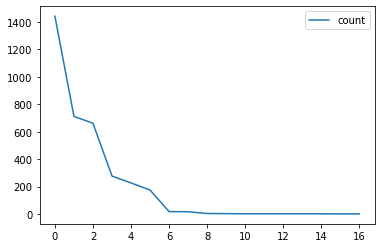

In [16]:
df_osm_building_types.plot()

What is it doing? What does it choose to plot by default?

Let's change this by specifying a horizontal bar graph `.barh` and adding arguments for size `figsize` and `x`:

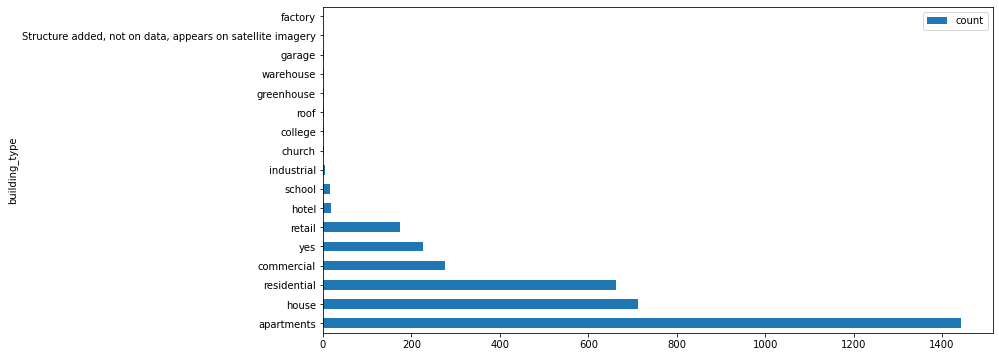

In [17]:
df_osm_building_types.plot.barh(figsize=(12,6),
                                x='building_type')

## Sorting a dataframe

oops! A horizontal bar reverses the order of the values on the y axis. Let's fix that.

In [18]:
# sort it the other way
df_osm_building_types = df_osm_building_types.sort_values(by='count', ascending=True)
df_osm_building_types

building_type  count
16                                            factory      1
15  Structure added, not on data, appears on satel...      1
14                                             garage      2
13                                          warehouse      2
12                                         greenhouse      2
11                                               roof      2
10                                            college      2
9                                              church      3
8                                          industrial      4
7                                              school     17
6                                               hotel     18
5                                              retail    175
4                                                 yes    227
3                                          commercial    277
2                                         residential    662
1                                               house    712
0                                          apartments   1442

Now output it again, but this time, only show the "Top 10"

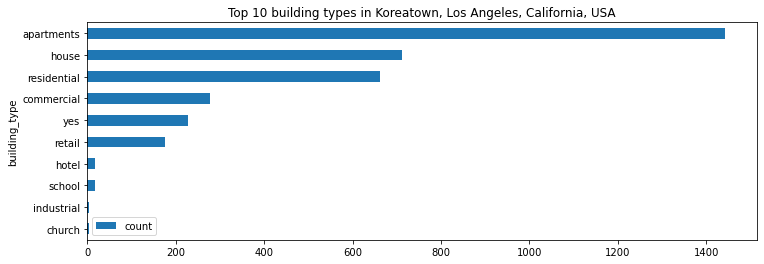

In [19]:
df_osm_building_types[-10:].plot.barh(figsize=(12,4),
                                      x='building_type',
                                      y='count',
                                      title="Top 10 building types in "+address)

## Geopandas Map Plots

Let's return to the original OSM data we downloaded. Remember that the OSMnx `geometries_from_address` command returned a geodataframe of buildings. Let's plot them:

In [21]:
# check the data type
type(osm)

geopandas.geodataframe.GeoDataFrame

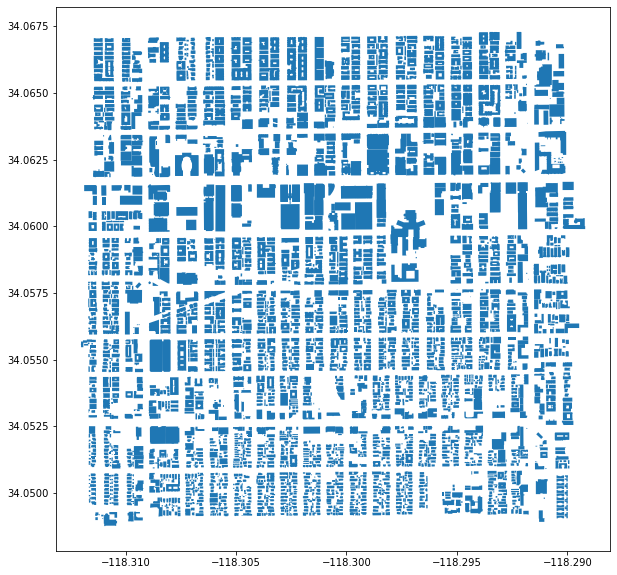

In [22]:
# plot entire dataset
osm.plot(figsize=(10,10))

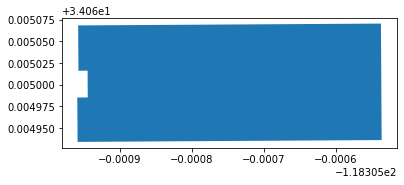

In [39]:
# plot a single random building
osm.sample(1).plot()

## Color coding buildings
Use the `column` argument to assign a column in the dataframe to color the polygons. If the column is numerical, it will poduce a numerically sequential map. If the column is categorical, it will produce a categorically colored map (a different color assigned to each distinct category).

You can use the `cmap` argument to assign a color palette. Find all the available options for `cmap` here:
- https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

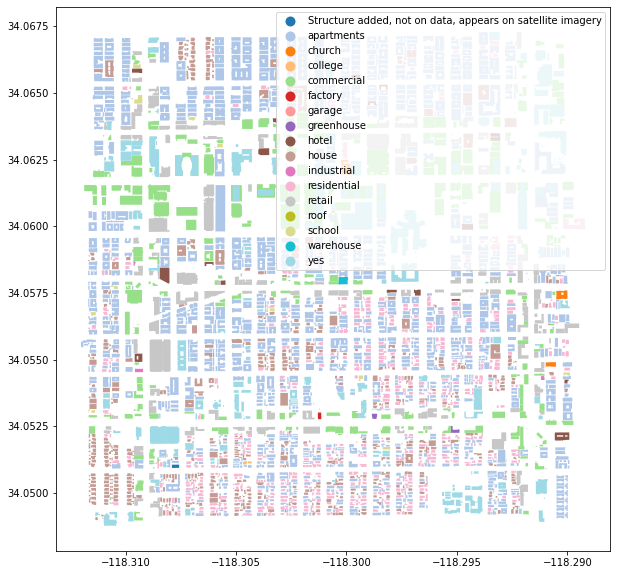

In [93]:
ax = osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

## Move the legend, no axis

Notice the `loc` and `bbox_to_anchor` arguments allows you to locate the legend outside the plot. Here is a good explanation of how that is done:

* https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132

You can also turn off the axis with the `ax.axis('off')` statement.

(-118.31316161499998, -118.28805268499998, 34.04782790499999, 34.068212995)

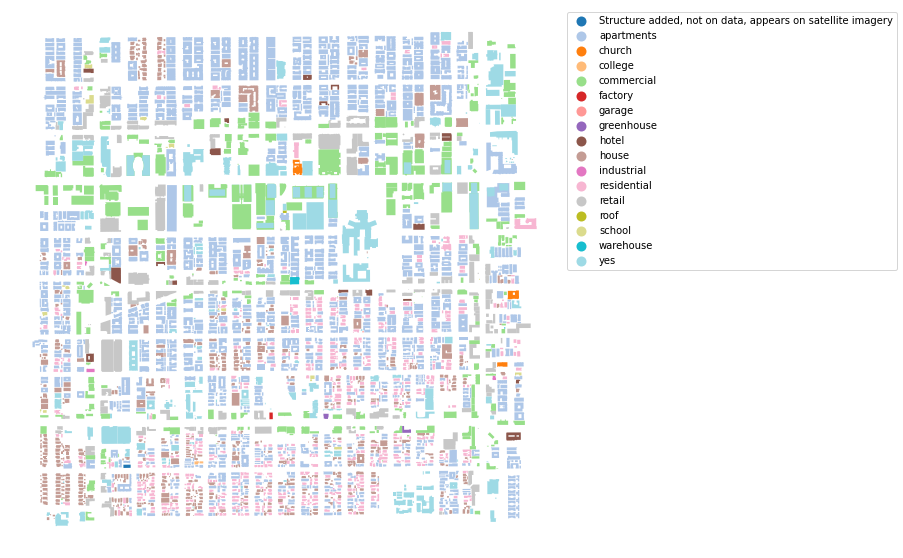

In [96]:
ax = osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})
ax.axis('off')

## Add a basemap

Adding a basemap to a geopandas plot can be done using the contextily library. To do so, you must:

* reproject your geodataframe to Web Mercator (epsg: 3857)

In [42]:
# reproject to Web Mercator
osm_web_mercator = osm.to_crs(epsg=3857)

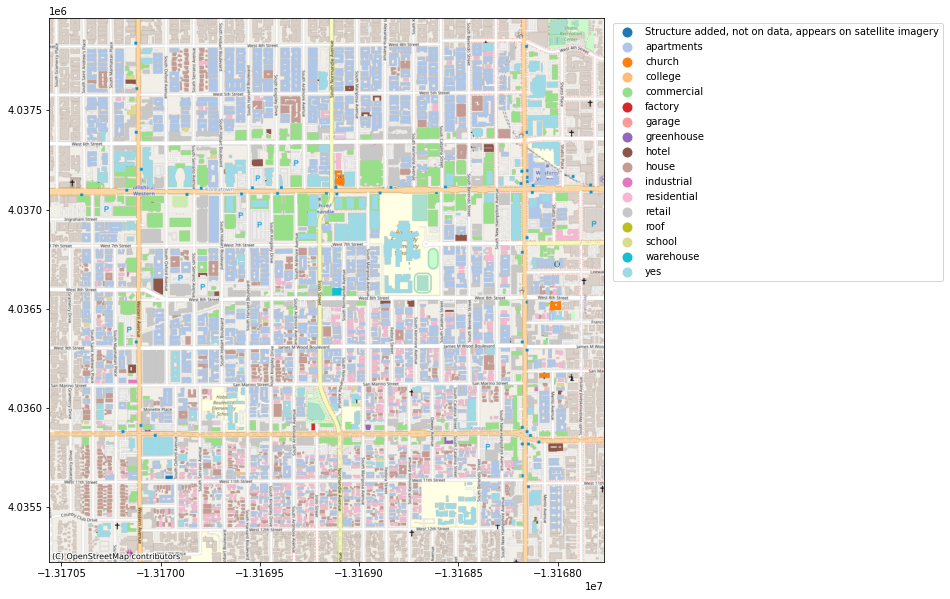

In [64]:
ax = osm_web_mercator.plot(figsize=(10,10),
                            column='building',
                            cmap='tab20',
                            legend=True,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)
# ctx.add_basemap(fig,source=ctx.providers.CartoDB.Positron)

# Create a function

Whew! That was a lot of work to finally get our building type map for a given location. But what if you wanted to repeat this process for *multiple* locations?

Welcome to the world of functions. 

In [73]:
# let's make this function together


In [89]:
# here is the function
def make_building_map(location):
    # get the data from osm
    osm = ox.geometries_from_address(location,
                                     tags={'building':True},
                                     dist=1000)
    
    # reproject to Web Mercator
    osm_web_mercator = osm.to_crs(epsg=3857)
    
    # create the map
    ax = osm_web_mercator.plot(figsize=(10,10),
                                column='building',
                                cmap='tab20',
                                legend=True,
                                legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})
    ax.axis('off')
#     ctx.add_basemap(fig,source=ctx.providers.OpenStreetMap.Mapnik)
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

CPU times: user 1.94 s, sys: 232 ms, total: 2.17 s
Wall time: 14.1 s


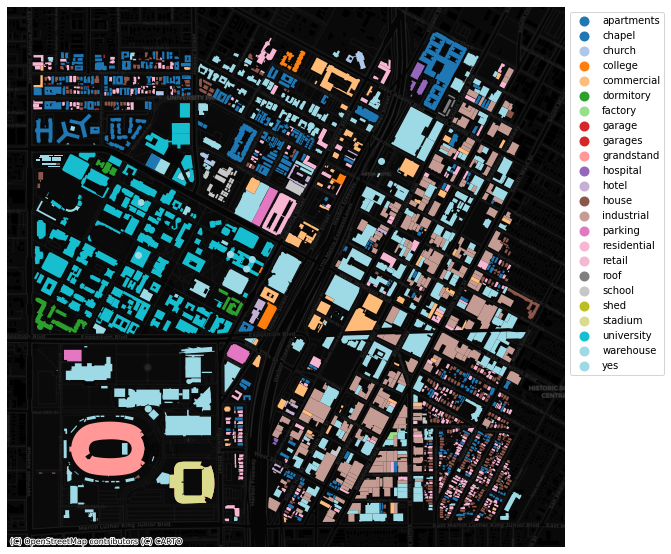

In [90]:
%%time
# run the function once
make_building_map('USC, Los Angeles, California, USA')

# Looping through it

To make the use of functions even more effective, let's create a list of addresses.

In [87]:
address_list = ['UCLA, Los Angeles, California, USA','USC, Los Angeles, California, USA']

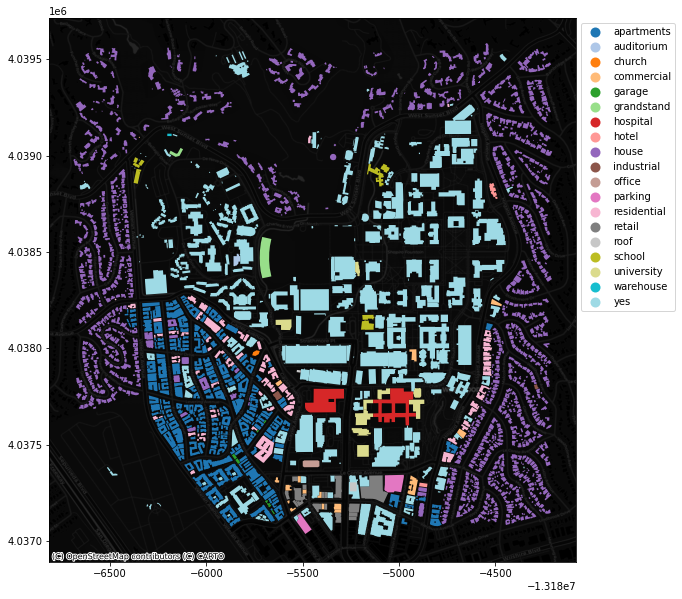

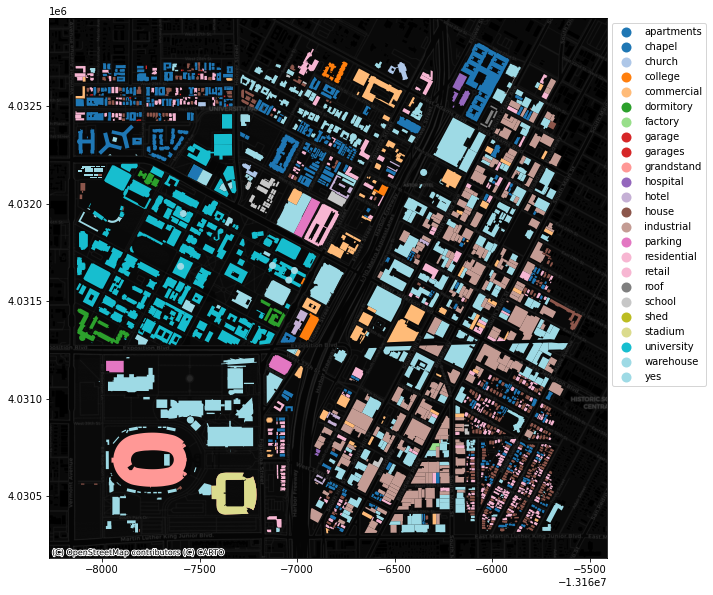

In [88]:
for address in address_list:
    make_building_map(address)

In [ ]:
building_types = G.building.unique().tolist()

In [ ]:
G[G.building=='house']

In [ ]:
G_web_mercator = G.to_crs(epsg=3857)

In [ ]:
xlim = [G_web_mercator.total_bounds[0],G_web_mercator.total_bounds[2]]
xlim

In [ ]:
ylim = [G_web_mercator.total_bounds[1],G_web_mercator.total_bounds[3]]
ylim

In [ ]:
ax = G_web_mercator.plot(figsize=(10,10),cmap='prism',legend=True)
ax.set_xlim(G_web_mercator.total_bounds[0],G_web_mercator.total_bounds[2])
ax.set_ylim(G_web_mercator.total_bounds[1],G_web_mercator.total_bounds[3])
# ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)
# ctx.add_basemap(ax)


In [ ]:
def building_map(type):
    ax = G_web_mercator[G_web_mercator.building==type].plot(figsize=(10,10),column='building',legend=True,cmap='prism')
    ax.set_xlim(G_web_mercator.total_bounds[0],G_web_mercator.total_bounds[2])
    ax.set_ylim(G_web_mercator.total_bounds[1],G_web_mercator.total_bounds[3])
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)


In [ ]:
for value in building_types:
    building_map(value)

In [ ]:
G = ox.geocode_to_gdf(places)

In [ ]:
# network from address, including only nodes within 1km along the network from the address
%time G = ox.graph_from_address(address=address, dist=2000, dist_type='network', network_type='drive')

In [ ]:
# you can project the network to UTM (zone calculated automatically)
G = ox.project_graph(G)

In [ ]:
type(G)

## Plot it

In [ ]:
# plot it
fig, ax = ox.plot_graph(G, node_color='r')

Make it pretty

In [ ]:
# plot it with arguments
ax = ox.plot_graph(G,
             bgcolor='#fff',
             edge_color='#aaa',
             node_color='#888',
             node_size=10,
             figsize = (12,12) )

*Note* the plot above shows the network within 500m (traveling distance along the network) from the `location_point`. By default, the `network_type` parameter value is 'all', meaning that we do not filter out paths that restrict certain types of traffic. This also means that one-way streets are honored as one-way and you cannot travel the wrong direction down them. Thus, the 500m takes into account only those nodes you can reach within 500m while only traveling in the allowed direction of the street. Instead (below), we can specify `network_type='walk'` to build a street network only of paths that walking is allowed on. This also makes every path bi-directional in the directed network, because you can walk in either direction on the sidewalk of a one-way street. Thus, the 500m now takes into account those nodes you can reach within 500m while traveling in either direction (even if it's a one-way street).

<div class="alert alert-info">
    Try it yourself! Choose a city anywhere in the world, and display a map of its street network.
</div>

## Convert to geodataframes

In [ ]:
# convert this graph, networkx, to geodataframe
# it has two objects (layers), nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

## Nodes

Nodes are street intersections

In [ ]:
type(nodes)

In [ ]:
nodes.head()

In [ ]:
ax = nodes.plot(figsize=(20,12))

## Edges
Edges are street segments

In [ ]:
edges.head()

In [ ]:
ax = edges.plot(figsize=(20,12))

## Adding basemaps

In [ ]:
edges = edges
ax = edges.plot(figsize=(20,12),color='red')
ctx.add_basemap(ax)

In [ ]:
edges = edges.to_crs(epsg=3857)
ax = edges.plot(figsize=(20,12),color='red')
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)

## Areas
Areas are place boundary polygons

In [ ]:
# get the place polygon
area = ox.geocode_to_gdf(address)

In [ ]:
area

In [ ]:
type(area)

In [ ]:
area.plot(figsize=(20,12))

## Search by map feature

* Full list of features from OSM (https://wiki.openstreetmap.org/wiki/Map_Features)

Examples calls to intake features from OSM:

```python
# for all buildings (could be a very large query)
features = ox.geometries_from_place(place, tags={'building': True})

# for specific buildings
features = ox.geometries_from_place(place, tags={'building': ['retail','industrial','commercial']})

# for amenities
features = ox.geometries_from_place(place, tags={'amenity': ['restaurant','fast_food']})

# for leisure spaces
features = ox.geometries_from_place(place, tags={'leisure': ['park']})
```

In [ ]:
%time features = ox.geometries_from_place('westwood, los angeles, ca',tags={'building': True})

In [ ]:
features.info()

In [ ]:
features.sample(3)

In [ ]:
features.building.value_counts()

In [ ]:
features.building.value_counts().plot.bar()

## Map it

In [ ]:
type(features)

In [ ]:
features = features.to_crs(epsg=3857)

In [ ]:
ax = features.plot(figsize=(15,15),column='building', legend=True,alpha=0.8)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

In [ ]:
# spice it up a bit
map = features.plot(figsize=(12,10),column='building',legend=True)
map.axis('off')
ctx.add_basemap(map,source=ctx.providers.Stamen.TonerLite)
import matplotlib.pyplot as plt
plt.ylim(4033000, 4034000)
plt.xlim(-13159000,-13156000)

## Points of interest

Points of interest
- https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.pois

List of tags, or "amenities"
- https://wiki.openstreetmap.org/wiki/Key:amenity

In [ ]:
# retrieve restaurants
restaurants = ox.geometries_from_place(place, tags = {'amenity': ['restaurant','fast_food']})
schools = ox.geometries_from_place(place, tags = {'amenity': ['school']})
parks = ox.geometries_from_place(place, tags = {'leisure': ['park']})


## Plotting all this data

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))

# plot the area polygon
area.plot(ax=ax, facecolor='gainsboro',alpha=0.7,linewidth=1.5,edgecolor='red')

# plot the street edges
# edges.plot(ax=ax, edgecolor='gray', linewidth=0.5, alpha=0.7)

# plot building footprints
# features.plot(ax=ax)

# plot restaurants
restaurants.plot(ax=ax,color='darkred',markersize=150)

# plot restaurants
parks.plot(ax=ax,color='green',alpha=0.7)

# plot schools
schools.plot(ax=ax,color='orange',markersize=50,legend=True)

ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite,crs=4326)